## Imports

In [1]:
#import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd

## Retrieve data from Nikola Jokic

In [2]:
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail, commonallplayers

# Get player ID for Nikola Jokic
players = commonallplayers.CommonAllPlayers(is_only_current_season=1).get_data_frames()[0]
jokic_info = players[players['DISPLAY_FIRST_LAST'] == 'Nikola Jokic']
player_id = jokic_info['PERSON_ID'].values[0]
team_id = jokic_info['TEAM_ID'].values[0]

# Get shot chart detail for Nikola Jokic
shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA').get_data_frames()[0]

# Create DataFrame from shot chart data
df = pd.DataFrame(shot_chart[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']])
print(df)

      LOC_X  LOC_Y  SHOT_MADE_FLAG
0        31      7               1
1         0      0               1
2       104    236               1
3        22     12               1
4         0     54               0
...     ...    ...             ...
1406      7      7               1
1407      0      0               0
1408    -48     60               1
1409     -5     90               0
1410     18      7               0

[1411 rows x 3 columns]


## Nikola jokic carear shots (every attempted shot)

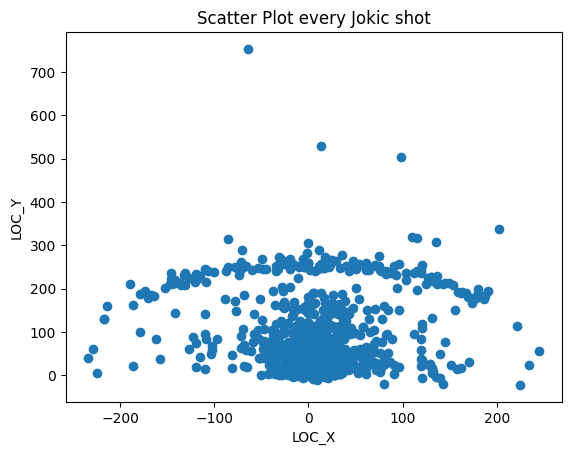

In [3]:


import pandas as pd
import matplotlib.pyplot as plt



# Scatter plot of LOC_X and LOC_Y
plt.scatter(df['LOC_X'], df['LOC_Y'])

# Set plot labels
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')

# Set plot title
plt.title('Scatter Plot every Jokic shot')

# Show the plot
plt.show()



## Code to generate shots made/shots missed scatter

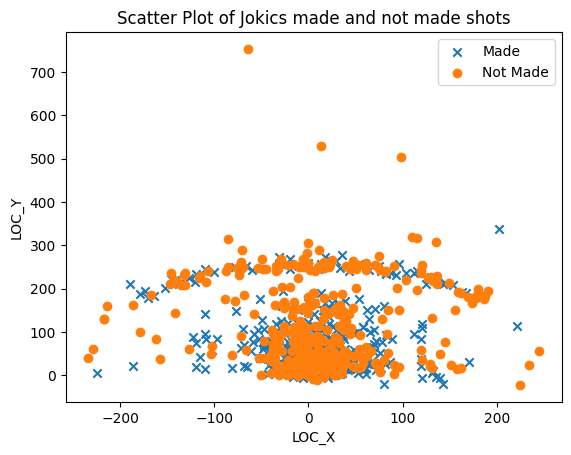

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# Scatter plot of LOC_X and LOC_Y with different markers for shots made and not made
scatter_x = plt.scatter(df[df['SHOT_MADE_FLAG'] == 1]['LOC_X'], df[df['SHOT_MADE_FLAG'] == 1]['LOC_Y'], marker='x', label='Made')
scatter_y = plt.scatter(df[df['SHOT_MADE_FLAG'] == 0]['LOC_X'], df[df['SHOT_MADE_FLAG'] == 0]['LOC_Y'], marker='o', label='Not Made')

# Set plot labels
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')

# Set plot title
plt.title('Scatter Plot of Jokics made and not made shots')

# Show the legend
plt.legend()

# Show the plot
plt.show()



## Generate NBA Court

In [5]:
#court dimensions 
#length 94/2 ft
#width 50 ft
#half court
#print(df['LOC_X'])

In [6]:
def create_court_with_shots(df):
    import pandas as pd
    import matplotlib.pyplot as plt
    scatter_x = plt.scatter(df[df['SHOT_MADE_FLAG'] == 1]['LOC_X'], df[df['SHOT_MADE_FLAG'] == 1]['LOC_Y'], marker='x', label='Made')
    scatter_y = plt.scatter(df[df['SHOT_MADE_FLAG'] == 0]['LOC_X'], df[df['SHOT_MADE_FLAG'] == 0]['LOC_Y'], marker='o', label='Not Made')

    # Set plot labels
    plt.xlabel('LOC_X')
    plt.ylabel('LOC_Y')

    # Set plot title
    plt.title('Scatter Plot of Jokics made and not made shots')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()
    
   

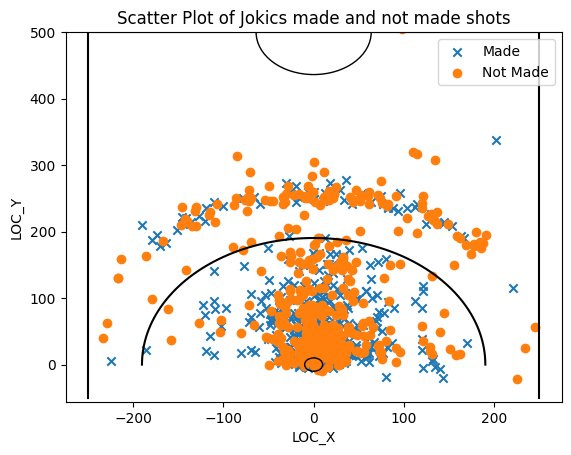

In [7]:
def create_court_with_shots(df):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    # Create scatter plot for made and missed shots
    scatter_x = plt.scatter(df[df['SHOT_MADE_FLAG'] == 1]['LOC_X'], df[df['SHOT_MADE_FLAG'] == 1]['LOC_Y'], marker='x', label='Made')
    scatter_y = plt.scatter(df[df['SHOT_MADE_FLAG'] == 0]['LOC_X'], df[df['SHOT_MADE_FLAG'] == 0]['LOC_Y'], marker='o', label='Not Made')

    # Set plot labels
    plt.xlabel('LOC_X')
    plt.ylabel('LOC_Y')

    # Set plot title
    plt.title('Scatter Plot of Jokics made and not made shots')

    # Draw NBA half court lines
    
    plt.plot([-250, 250], [500, 500], color='black')  # Center line
    plt.plot([-250, -250], [550, -50], color='black') #side line 1
    plt.plot([250, 250], [550, -50], color='black') #side line 2

    # 3 point line
    center = (0, 0)  
    radius = 190.366972  
    theta = np.linspace(0, np.pi, 100)  # Angles from 0 to pi (half circle)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    plt.plot(x, y, color='black')

    #Center circle
    circle = plt.Circle((0, 500), 63.829787, color='black', fill=False)  # Circle centered at (0, 0) with radius 5
    plt.gca().add_patch(circle) # add cirle to plot

    #hoop circle
    circle = plt.Circle((0, 0), 10, color='black', fill=False)  # Circle centered at (0, 0) with radius 5
    plt.gca().add_patch(circle) # add cirle to plot
     # Set y-axis limit
    plt.ylim(-55.8510638, 500)

    
    # Show the legend
    plt.legend()
    # Show the plot
    plt.show()
create_court_with_shots(df)

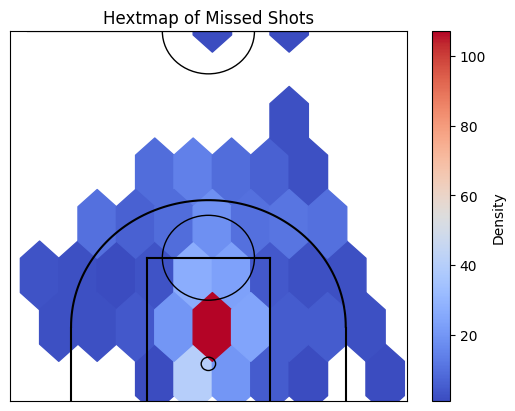

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_court_with_shots_heatmap(df):
    # Extract shot locations
    x_made = df[df['SHOT_MADE_FLAG'] == 1]['LOC_X']
    y_made = df[df['SHOT_MADE_FLAG'] == 1]['LOC_Y']
    
    x_missed = df[df['SHOT_MADE_FLAG'] == 0]['LOC_X']
    y_missed = df[df['SHOT_MADE_FLAG'] == 0]['LOC_Y']

    # Create heatmap for made and missed shots
    #plt.hexbin(x_made, y_made, gridsize=9, cmap='RdYlGn', alpha=.8, mincnt=1)
    plt.hexbin(x_missed, y_missed, gridsize=9, cmap='coolwarm', alpha=1, mincnt=1)

    # Court lines
    plt.plot([85.106383, 85.106383], [-55.8510638, 159.574468], color='black')  # Center line
    plt.plot([-85.106383, -85.106383], [-55.8510638, 159.574468], color='black') # Side line 1
    plt.plot([-85.106383, 85.106383], [159.574468, 159.574468], color='black')   # Side line 2
    plt.plot([-250, 250], [500, 500], color='black') 
    plt.plot([-250, 250], [500, 500], color='black')  
    plt.plot([-190.366972, -190.366972], [-55.8510638, 54.0851062], color='black')  # Free throw vertical 1
    plt.plot([190.366972, 190.366972], [-55.8510638, 54.0851062], color='black')  # Free throw vertical 2
    
    # 3 point line
    center = (0, 55.8510638)  
    radius = 190.366972  
    theta = np.linspace(0, np.pi, 100)  # Angles from 0 to pi (half circle)
    x_3pt = center[0] + radius * np.cos(theta)
    y_3pt = center[1] + radius * np.sin(theta)
    plt.plot(x_3pt, y_3pt, color='black')

    # Center circle
    circle = plt.Circle((0, 500), 63.829787, color='black', fill=False)  
    plt.gca().add_patch(circle)

    # Free throw circle
    circle = plt.Circle((0, 159.574468), 63.8297872, color='black', fill=False)  
    plt.gca().add_patch(circle)
    
    # Hoop circle
    circle = plt.Circle((0, 0), 10, color='black', fill=False)  
    plt.gca().add_patch(circle)

    # Set y-axis limit
    plt.ylim(-55.8510638, 500)
    
    # Set plot labels
    #plt.xlabel('LOC_X')
    #plt.ylabel('LOC_Y')

    # Set plot title
    plt.title('Hextmap of Missed Shots')

    # Show the colorbar
    plt.colorbar(label='Density')
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Show the plot
    plt.show()

# Call the function with your DataFrame
create_court_with_shots_heatmap(df)

In [9]:
#make it a log scale
#log scale density,10,100,1000,10000
#have a percentage denisty function for each hex or do as squares

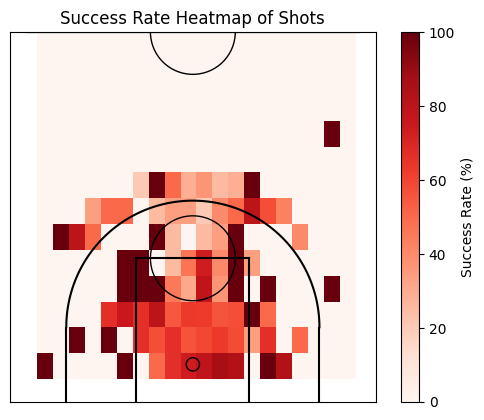

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_court_with_shots_heatmap(df):
    # Define grid size
    grid_size = 20  # You can adjust this value based on your preference
    
    # Calculate grid boundaries
    x_min, x_max = df['LOC_X'].min(), df['LOC_X'].max()
    y_min, y_max = df['LOC_Y'].min(), df['LOC_Y'].max()
    
    # Calculate grid width and height
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # Calculate grid counts for successful shots
    df_success = df[df['SHOT_MADE_FLAG'] == 1]
    Total_successful_shots= np.histogram2d(df_success['LOC_X'], df_success['LOC_Y'], bins=grid_size, range=[[x_min, x_max], [y_min, y_max]])
    
    # Calculate grid counts for all shots
    Total_shots = np.histogram2d(df['LOC_X'], df['LOC_Y'], bins=grid_size, range=[[x_min, x_max], [y_min, y_max]])
    
    # Calculate success rates for each grid
    success_rates = np.divide(Total_successful_shots, Total_shots, out=np.zeros_like(grid_counts_success), where=Total_shots != 0) * 100
    
    # Plot heatmap
    plt.imshow(success_rates.T, cmap='Reds', origin='lower', extent=[x_min, x_max, y_min, y_max], interpolation='nearest')
    plt.colorbar(label='Success Rate (%)')
    
    # Court lines
    plt.plot([85.106383, 85.106383], [-55.8510638, 159.574468], color='black')  # Center line
    plt.plot([-85.106383, -85.106383], [-55.8510638, 159.574468], color='black') # Side line 1
    plt.plot([-85.106383, 85.106383], [159.574468, 159.574468], color='black')   # Side line 2
    plt.plot([-250, 250], [500, 500], color='black')  # Center line
    plt.plot([-250, 250], [500, 500], color='black')  # Center line
    plt.plot([-190.366972, -190.366972], [-55.8510638, 54.0851062], color='black')  # Center line
    plt.plot([190.366972, 190.366972], [-55.8510638, 54.0851062], color='black')  # Center line
    
    # 3 point line
    center = (0, 55.8510638)  
    radius = 190.366972  
    theta = np.linspace(0, np.pi, 100)  # Angles from 0 to pi (half circle)
    x_3pt = center[0] + radius * np.cos(theta)
    y_3pt = center[1] + radius * np.sin(theta)
    plt.plot(x_3pt, y_3pt, color='black')

    # Center circle
    circle = plt.Circle((0, 500), 63.829787, color='black', fill=False)  
    plt.gca().add_patch(circle)

    # Free throw circle
    circle = plt.Circle((0, 159.574468), 63.8297872, color='black', fill=False)  
    plt.gca().add_patch(circle)
    
    # Hoop circle
    circle = plt.Circle((0, 0), 10, color='black', fill=False)  
    plt.gca().add_patch(circle)

    # Set plot labels and title
    #plt.xlabel('LOC_X')
    #plt.ylabel('LOC_Y')
    plt.title('Success Rate Heatmap of Shots')

    # Set y-axis limit
    plt.ylim(-55.8510638, 500)

    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Show plot
    plt.show()

# Call the function with your DataFrame
create_court_with_shots_heatmap(df)

In [5]:
notebook_filename = 'FYP_heatmap_generate.ipynb'  # Change this to your notebook's filename

# Initialize line count
line_count = 0

# Open the notebook file
with open(notebook_filename, 'r', encoding='utf-8') as f:
    # Loop through each line in the file
    for line in f:
        # Increment line count
        line_count += 1

# Print the total line count
print("Total lines of code in the notebook:", line_count)


Total lines of code in the notebook: 530
